In [1]:
%matplotlib inline

In [16]:
from grid.gmt import GMTGrid
from grid.shake import ShakeGrid
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path
import matplotlib

The Grid class hierarchy can be used for reading, writing and manipulating various kinds 
of 2D grid formats (GMT grids), or multi-layer 2D grid formats (ShakeMap).

In [17]:
#######MODIFY THIS TO REFLECT THE LOCATION OF A GLOBAL GRID ON YOUR SYSTEM####
popgrid = os.path.join(os.path.expanduser('~'),'pager','data','lspop2012.grd')
vs30grid = os.path.join(os.path.expanduser('~'),'secondary','data','global_vs30.grd')
shakemap = os.path.join(os.path.expanduser('~'),'data','shakemaps','northridge.xml')
##############################################################################

The grid classes can be used to get spatial information about the file before opening it. 

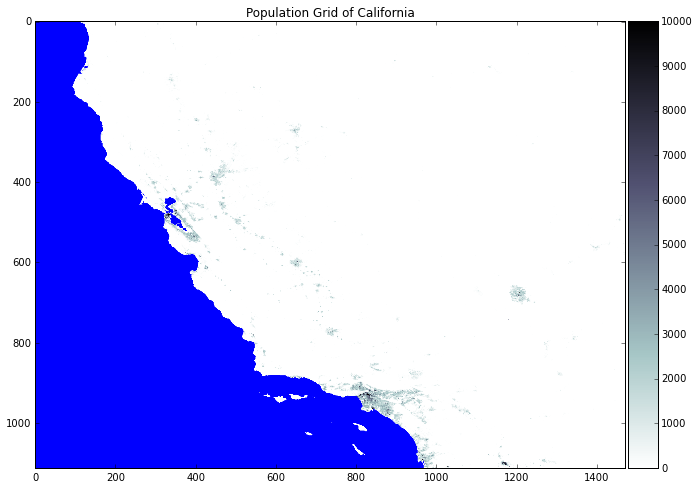

In [19]:
#41.798959,-125.178223 ulcorner of calif
#32.543919,-112.950439 lrcorner of calif
sdict = {'xmin':-125.178223,'xmax':-112.950439,'ymin':32.543919,'ymax':41.798959,'xdim':0.008,'ydim':0.008}
grid = GMTGrid.load(popgrid,samplegeodict=sdict)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8));
data = grid.getData().copy()
data[data == -9999] = np.nan
data = np.ma.array (data, mask=np.isnan(data))
cmap = matplotlib.cm.bone_r
cmap.set_bad('b',1.)
im = plt.imshow(data,cmap=cmap,vmin=0,vmax=10000)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05);
plt.colorbar(im, cax=cax);
ax.set_title('Population Grid of California');

Let's test meridian crossing reads

175.883238038 181.566702933 -18.6049140284 -14.996407874


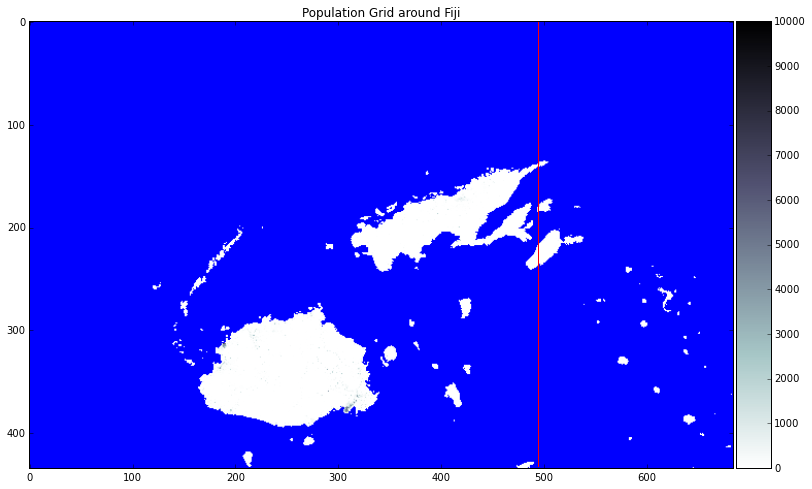

In [25]:
#LL: -18.606228,175.891113
#UR: -14.990556,-178.439941
sdict = {'xmin':175.891113,'xmax':-178.439941,'ymin':-18.606228,'ymax':-14.990556}
grid = GMTGrid.load(popgrid,samplegeodict=sdict)
xmin,xmax,ymin,ymax = grid.getBounds()
print xmin,xmax,ymin,ymax
m1y,m1x = grid.getRowCol(ymin,180.0)
m2y,m2x = grid.getRowCol(ymax,180.0)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8));
data = grid.getData().copy()
data[data == -9999] = np.nan
data = np.ma.array (data, mask=np.isnan(data))
cmap = matplotlib.cm.bone_r
cmap.set_bad('b',1.)
im = plt.imshow(data,cmap=cmap,vmin=0,vmax=10000)
axlim = plt.axis()
plt.hold(True)
plt.plot([m1x,m2x],[m1y,m2y],'r')
plt.axis(axlim)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05);
plt.colorbar(im, cax=cax);
ax.set_title('Population Grid around Fiji');